In [1]:
import numpy as np
from matplotlib import pyplot as plt

from filters import KalmanFilter
from utils import generate_pos_vel_data, load_sonar_data

# 예제 9-1 Velocity estimation from Positon measurement

In [2]:
def plot_result(ts, pred, meas, title=''):
    fig = plt.figure(figsize=[16, 9])
    try:
        plt.plot(ts, meas, "ro--", label='meas')
    except:
        pass
    try:
        plt.plot(ts, pred, "b-", label='pred')
    except:
        pass
    plt.legend()
    plt.title(title)
    plt.show()

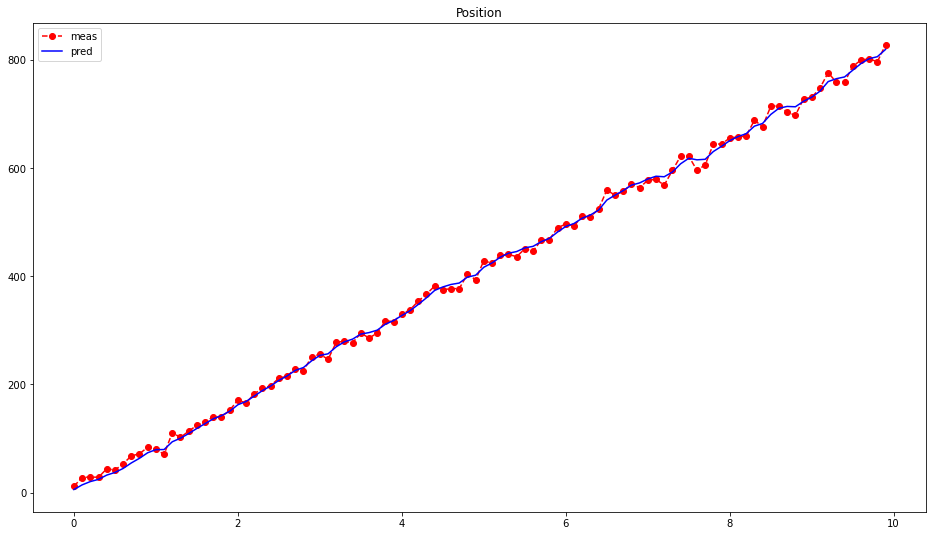

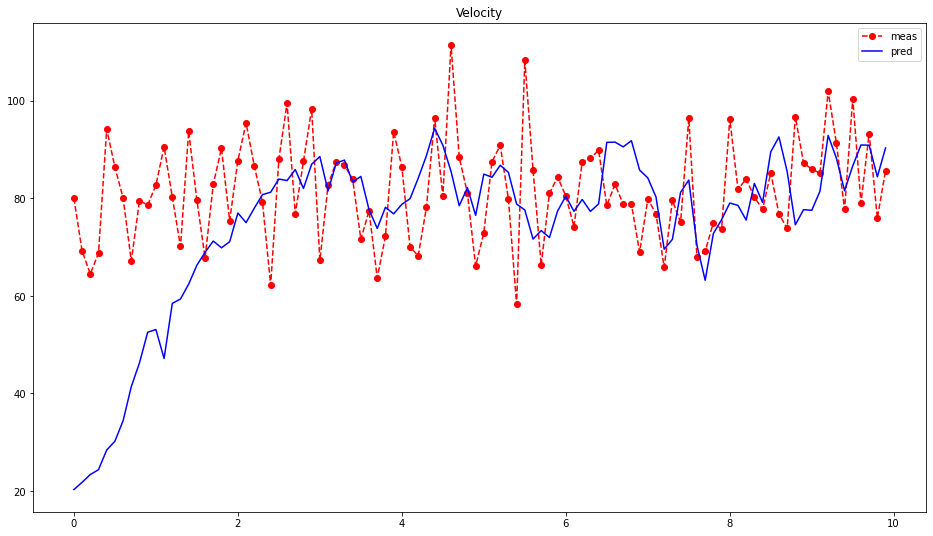

In [3]:
max_time = 10
dt = 0.1
ts = np.arange(0, max_time, dt)

kf = KalmanFilter(
    x0 = np.array([0, 20]).reshape(2, 1),
    P0 = np.array([5, 0, 0, 5]).reshape(2, 2),
    A = np.array([1, dt, 0, 1]).reshape(2, 2),
    H = np.array([1, 0]).reshape(1, 2),
    Q = np.array([1, 0, 0, 3]).reshape(2, 2),
    R = np.array([10]).reshape(1, 1)
)

vel_pred, vel_meas = [], []
pos_pred, pos_meas = [], []
for t, (z, v) in zip(ts, generate_pos_vel_data(dt)):
    kf.update(z)
    
    pos_pred.append(kf.get()[0, 0])
    vel_pred.append(kf.x[1, 0])
    pos_meas.append(z)
    vel_meas.append(v)
    
plot_result(ts, pos_pred, pos_meas, "Position")
plot_result(ts, vel_pred, vel_meas, "Velocity")

# Position estimation from Velocity measurement

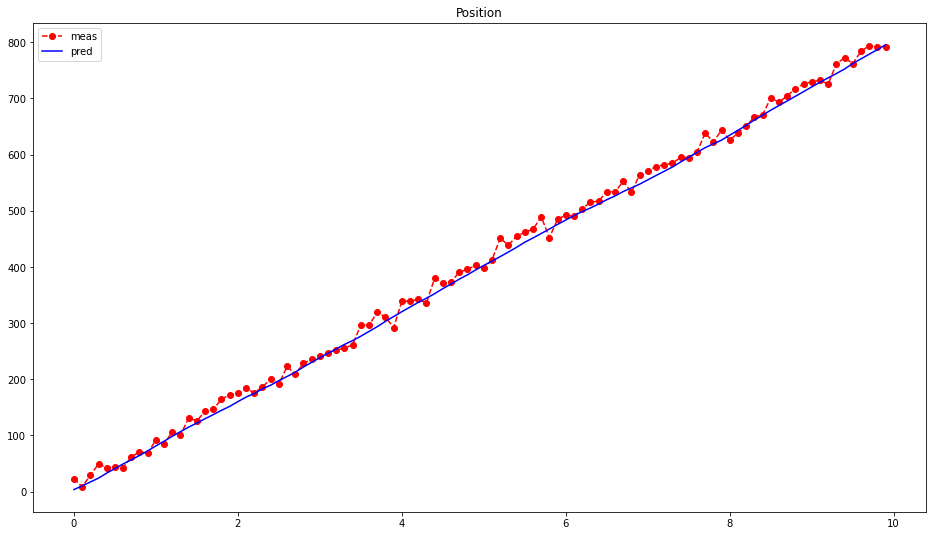

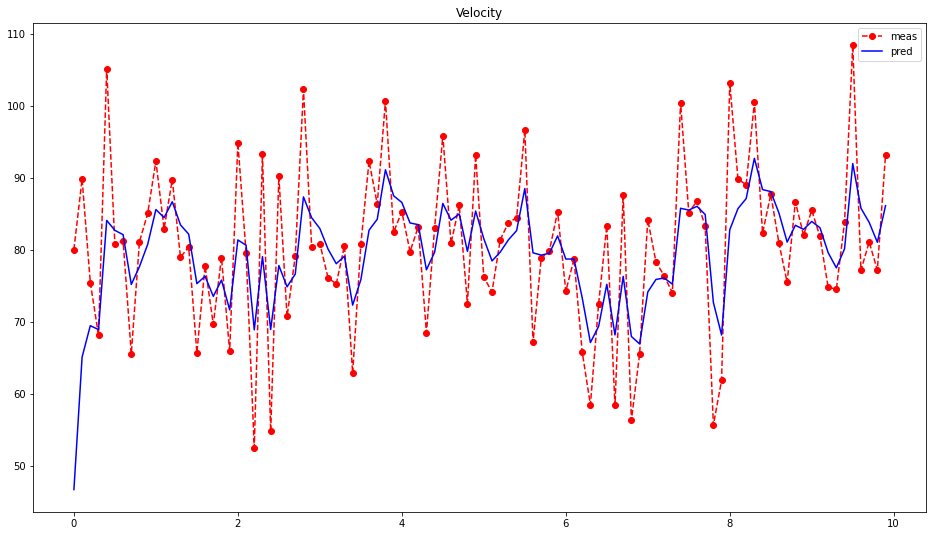

In [4]:
max_time = 10
dt = 0.1
ts = np.arange(0, max_time, dt)

kf = KalmanFilter(
    x0 = np.array([0, 20]).reshape(2, 1),
    P0 = np.array([5, 0, 0, 5]).reshape(2, 2),
    A = np.array([1, dt, 0, 1]).reshape(2, 2),
    H = np.array([0, 1]).reshape(1, 2),
    Q = np.array([1, 0, 0, 3]).reshape(2, 2),
    R = np.array([10]).reshape(1, 1),
)

vel_pred, vel_meas = [], []
pos_pred, pos_meas = [], []
for t, (z, v) in zip(ts, generate_pos_vel_data(dt)):
    kf.update(v)
    
    vel_pred.append(kf.get()[0, 0])
    pos_pred.append(kf.x[0, 0])
    vel_meas.append(v)
    pos_meas.append(z)
    
plot_result(ts, pos_pred, pos_meas, "Position")
plot_result(ts, vel_pred, vel_meas, "Velocity")

# Velocity Estimation from Sonar measurement

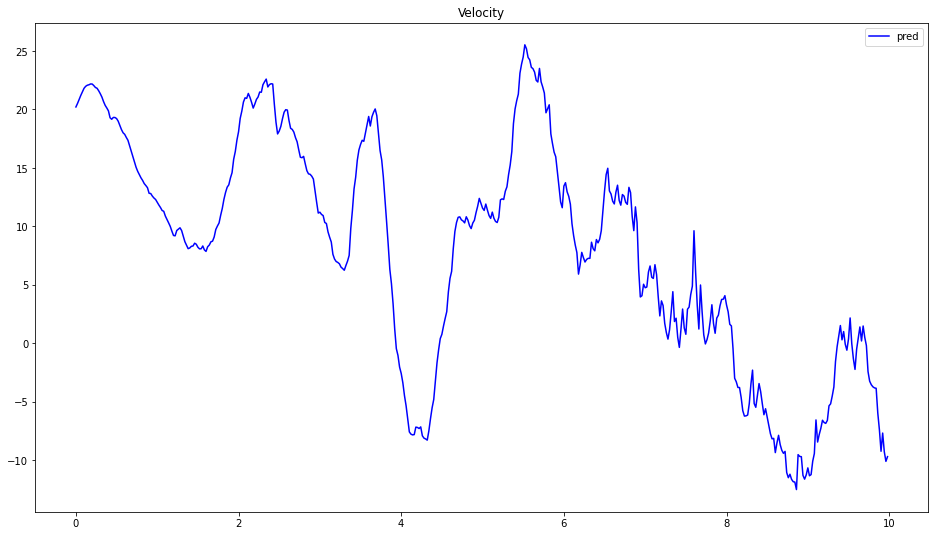

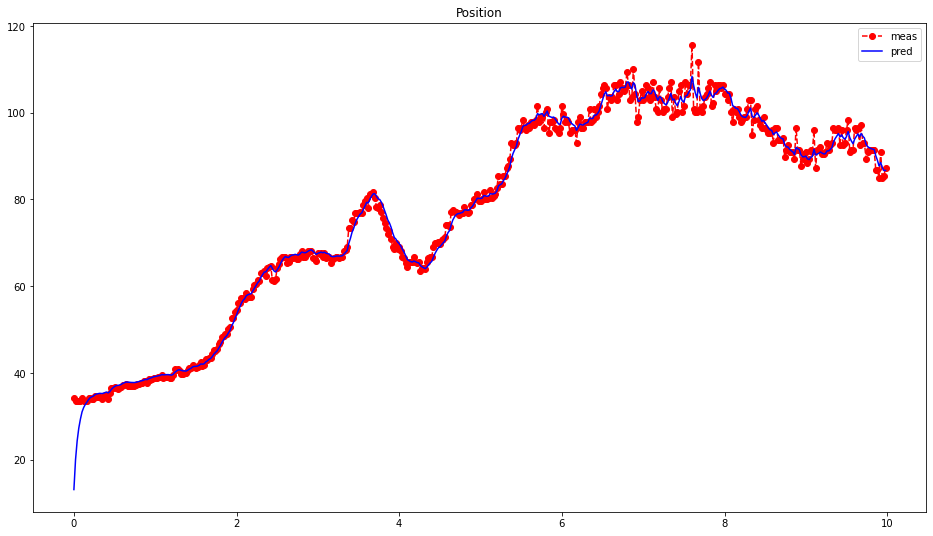

In [5]:
dt, ts, sonar_data = load_sonar_data()

kf = KalmanFilter(
    A = np.array([1, dt, 0, 1]).reshape(2, 2),
    H = np.array([1, 0]).reshape(1, 2),
    Q = np.array([1, 0, 0, 3]).reshape(2, 2),
    R = np.array([10]).reshape(1, 1),
    x0 = np.array([0, 20]).reshape(2, 1),
    P0 = np.array([5, 0, 0, 5]).reshape(2, 2),
)

vel_pred, vel_meas = [], []
pos_pred, pos_meas = [], []
for t, pos in zip(ts, sonar_data):
    kf.update(pos)
    
    vel_pred.append(kf.x[1, 0])
    pos_pred.append(kf.x[0, 0])
    pos_meas.append(pos)
    
plot_result(ts, vel_pred, vel_meas, "Velocity")
plot_result(ts, pos_pred, pos_meas, "Position")